## Drive Mounting
---

In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [2]:
import os
current_folder = "/content/gdrive/My Drive/Workshop/Level1/"
os.chdir(current_folder)

## Data Loading

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np
import datetime 

sq = pd.read_csv("metricsPart1.csv", index_col=0)
sq.head(3)

,label,link,pull_request_number,number_of_additions,number_of_files,closure_date,number_of_comm3nts,number_of_comm1ts,creation_date,number_of_deletions,number_of_labels,number_of_review_comm3nts,pull_request_state,update_date
0,refactoring,https://github.com/Rafess/final-challenge-nava...,3,275.0,10.0,2022-01-12T13:14:21Z,0.0,3.0,2022-01-12T04:46:15Z,2250.0,0.0,0.0,closed,2022-01-12T13:14:21Z
1,refactoring,https://github.com/f-lab-edu/hcs/pull/116,116,3.0,1.0,2022-01-12T05:09:51Z,0.0,1.0,2022-01-12T01:16:37Z,4.0,0.0,0.0,closed,2022-01-12T05:09:55Z
2,refactoring,https://github.com/snipershady/mssql_backup/pu...,1,371.0,13.0,2022-01-06T11:29:06Z,0.0,3.0,2022-01-06T11:28:57Z,383.0,0.0,0.0,closed,2022-01-06T11:29:06Z


## Metrics Status
---

- [X] number_of_comm3nts
- [X] number_of_comm1ts
- [X] number_of_files
- [ ] number_of_issue_comments
- [ ] number_of_issue_events
- [X] number_of_labels
- [X] number_of_review_comm3nts
- [ ] number_of_review_requests
- [ ] number_of_reviewers
- [X] number_of_additions
- [X] closure_date
- [X] creation_date
- [X] number_of_deletions
- [ ] locked_state
- [ ] merged_state
- [ ] merged_date
- [ ] milestone_status
- [ ] milestone_closure_date
- [ ] number_of_milestone_closed_issues
- [ ] milestone_creation_date
- [ ] milestone_due_on_date
- [ ] milestone_state
- [X] pull_request_number
- [X] pull_request_state
- [X] update_date
- [ ] number_of_participants
- [ ] number_of_file_changes

## Feature Proportion
---

In [22]:
print(sq.shape[0])

for label in labels:
    print(label, sq[sq["label"]==label].shape[0])

add linter 941
bug 211
coverage 536
documentation 437
functional requirements 715
refactoring 289
unstable build 650
unused 567


In [4]:
sq["closure_date"] = sq["closure_date"].apply(lambda x: datetime.datetime.strptime(x, "%Y-%m-%dT%H:%M:%SZ"))
sq["creation_date"] = sq["creation_date"].apply(lambda x: datetime.datetime.strptime(x, "%Y-%m-%dT%H:%M:%SZ"))
sq["update_date"] = sq["update_date"].apply(lambda x: datetime.datetime.strptime(x, "%Y-%m-%dT%H:%M:%SZ"))

In [5]:
sq.corr()

,pull_request_number,number_of_additions,number_of_files,number_of_comm3nts,number_of_comm1ts,number_of_deletions,number_of_labels,number_of_review_comm3nts
pull_request_number,1.000000,-0.017204,-0.015223,0.007490,-0.018394,-0.014708,0.336858,-0.038205
number_of_additions,-0.017204,1.000000,0.507807,0.062045,0.550328,0.415217,0.021300,0.035542
number_of_files,-0.015223,0.507807,1.000000,0.135349,0.775383,0.627205,0.075943,0.005576
number_of_comm3nts,0.007490,0.062045,0.135349,1.000000,0.127865,0.084932,0.417927,0.063549
number_of_comm1ts,-0.018394,0.550328,0.775383,0.127865,1.000000,0.733030,0.084030,0.010477
number_of_deletions,-0.014708,0.415217,0.627205,0.084932,0.733030,1.000000,0.063258,0.000506
number_of_labels,0.336858,0.021300,0.075943,0.417927,0.084030,0.063258,1.000000,-0.019408
number_of_review_comm3nts,-0.038205,0.035542,0.005576,0.063549,0.010477,0.000506,-0.019408,1.000000


In [6]:
labels = sorted(list(set(sq["label"])))
colors = cm.rainbow(np.linspace(0, 1, len(labels)))
camouflage = dict(zip(labels, colors))
features = ['pull_request_number', 'number_of_additions', 'number_of_files', 
            'closure_date', 'number_of_comm3nts', 'number_of_comm1ts', 
            'creation_date', 'number_of_deletions', 'number_of_labels', 
            'number_of_review_comm3nts', 'pull_request_state', 'update_date']

## Temporal Data
---

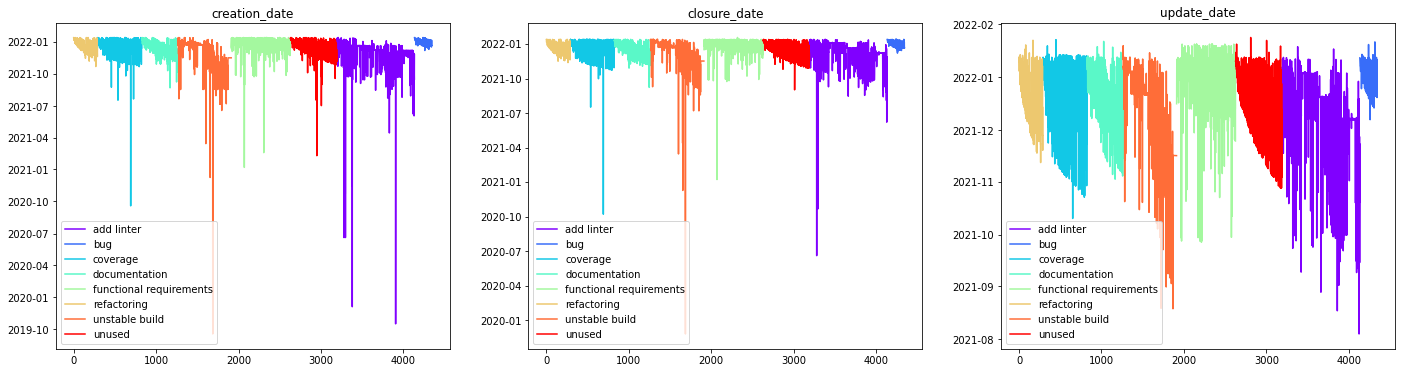

In [7]:
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(24, 6), sharex=False, sharey=True)

ax[0].set_axis_off()
ax[0] = fig.add_subplot(1, 3, 1)
for label in labels:
    ax[0].plot(sq[sq["label"]==label]["creation_date"], label=label, color=camouflage[label])
    ax[0].set_title("creation_date")
    ax[0].legend()

ax[1].set_axis_off()
ax[1] = fig.add_subplot(1, 3, 2)
for label in labels:
    ax[1].plot(sq[sq["label"]==label]["closure_date"], label=label, color=camouflage[label])
    ax[1].set_title("closure_date")
    ax[1].legend()

ax[2].set_axis_off()
ax[2] = fig.add_subplot(1, 3, 3)
for label in labels:
    ax[2].plot(sq[sq["label"]==label]["update_date"], label=label, color=camouflage[label])
    ax[2].set_title("update_date")
    ax[2].legend()

plt.show()   


## Additions & Deletions
---

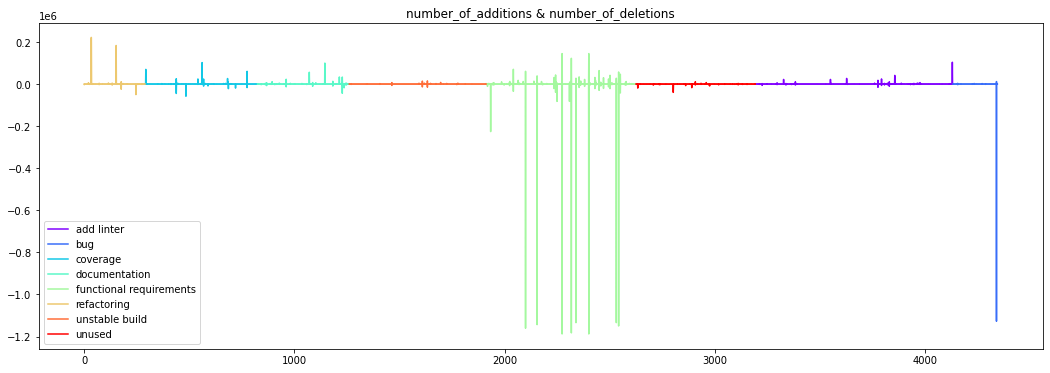

In [41]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(18, 6), sharex=False, sharey=False)
ax.set_axis_off()
ax = fig.add_subplot(1, 1, 1)
for label in labels:
    x = sq[sq["label"]==label]["number_of_additions"]
    y = -1*sq[sq["label"]==label]["number_of_deletions"]
    ax.plot(x, label=label, color=camouflage[label])
    ax.plot(y, color=camouflage[label])
    ax.set_title("number_of_additions & number_of_deletions")
    ax.legend()
plt.show()

## Comments & Commits
---

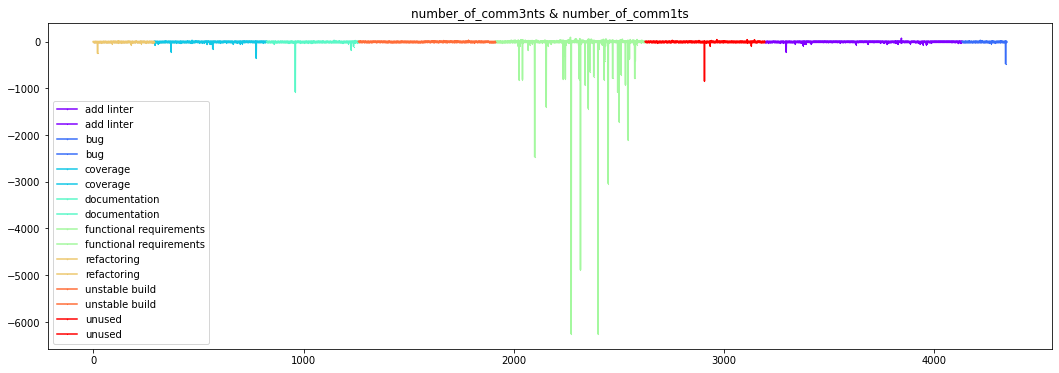

In [8]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(18, 6), sharex=False, sharey=False)
ax.set_axis_off()
ax = fig.add_subplot(1, 1, 1)
for label in labels:
    x = sq[sq["label"]==label]["number_of_comm3nts"]
    y = -1*sq[sq["label"]==label]["number_of_comm1ts"]
    ax.plot(x, label=label, color=camouflage[label], marker="o", linestyle="-", ms=0.5)
    ax.plot(y, label=label, color=camouflage[label], marker="*", linestyle="-", ms=0.5)
    ax.set_title("number_of_comm3nts & number_of_comm1ts")
    ax.legend()
plt.show()

## General Metrics Overview
---

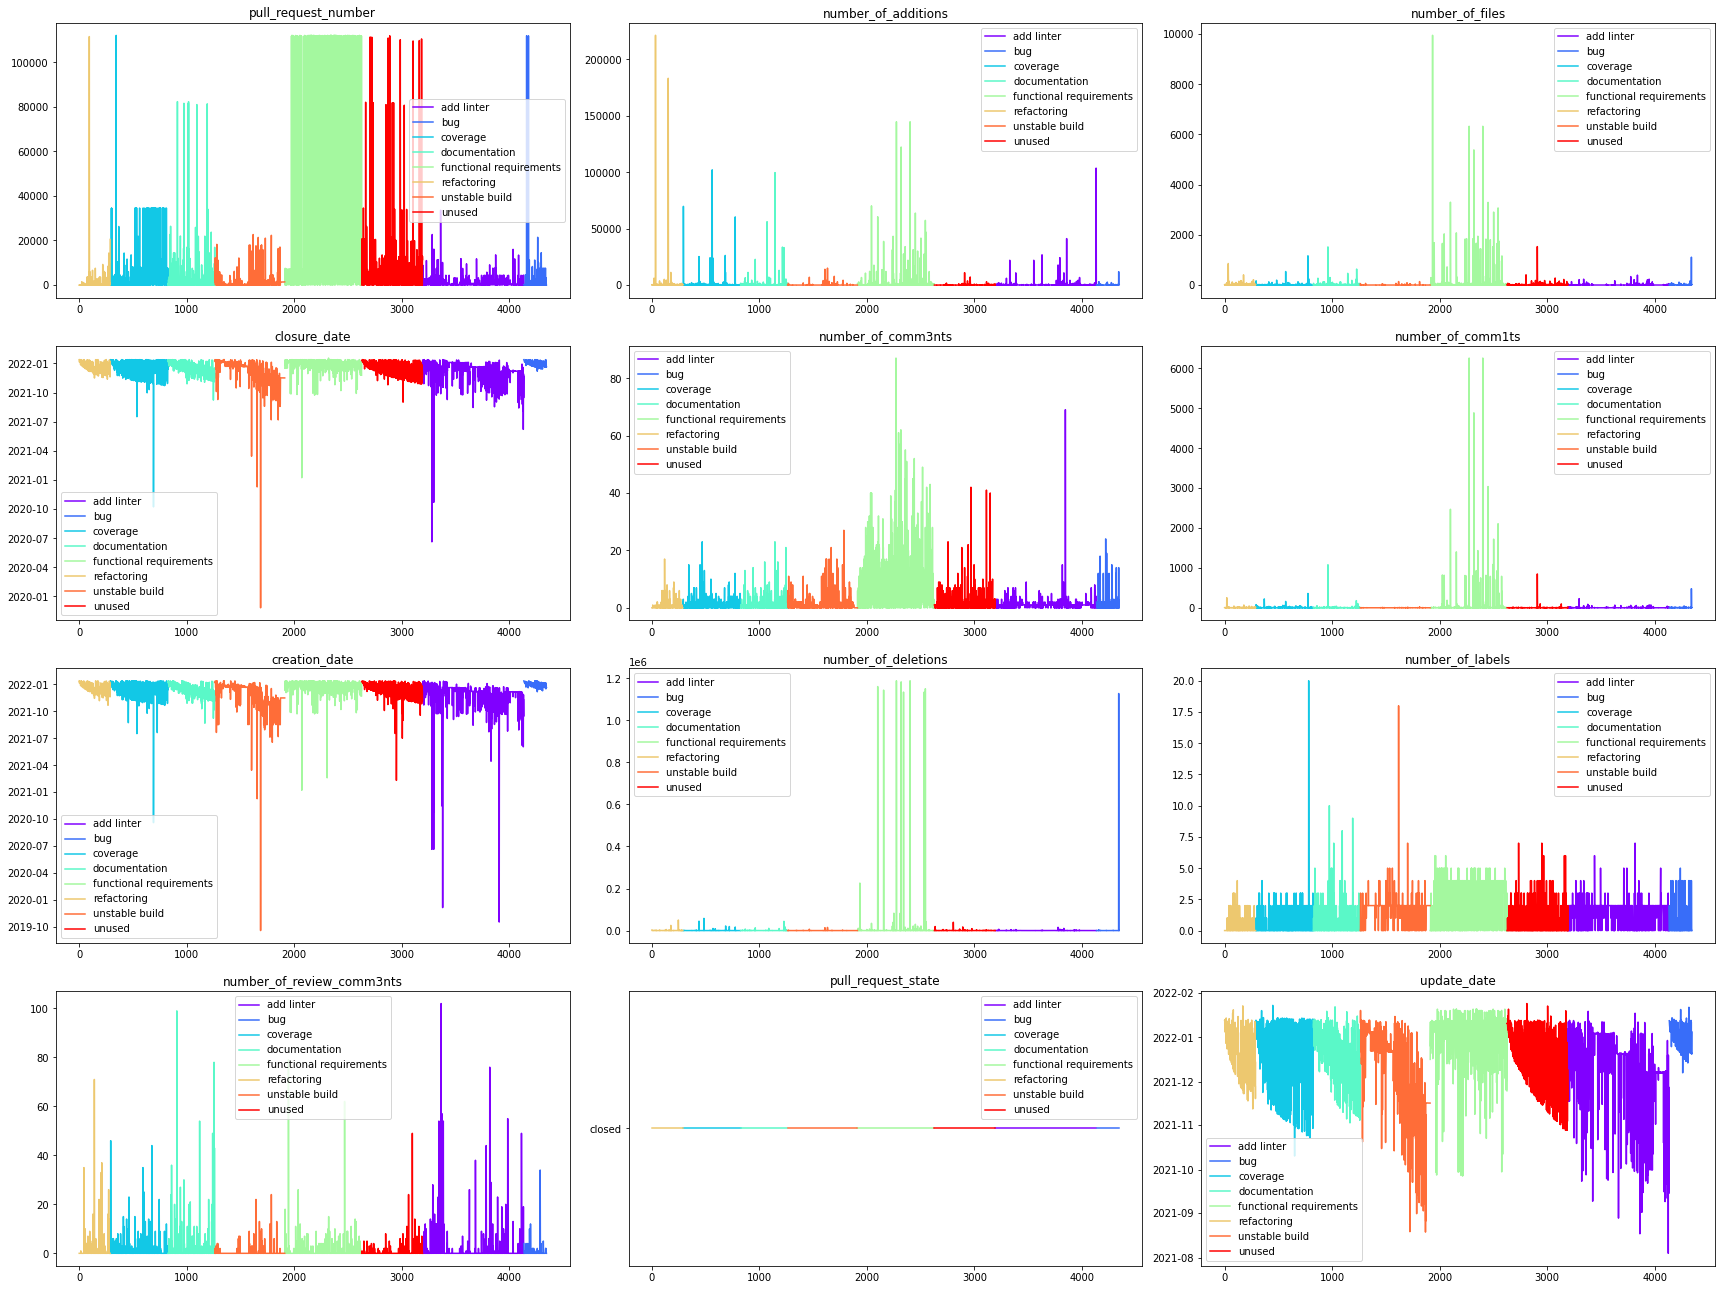

In [66]:
fig, ax = plt.subplots(nrows=4, ncols=3, figsize=(24, 18), sharex=False, sharey=False)

pos = [[(index, jndex) for index in range(4)] for jndex in range(3)]
positions = [item for sublist in pos for item in sublist]

for index, position in enumerate(positions):
    ax[position[0], position[1]].set_axis_off()
    ax[position[0], position[1]] = fig.add_subplot(4, 3, index+1)
    ax[position[0], position[1]].set_title(features[index])

    for indexx, label in enumerate(labels):
        ax[position[0], position[1]].plot(sq[sq["label"]==labels[indexx]][features[index]], color=colors[indexx], label=labels[indexx])
        
        ax[position[0], position[1]].legend()

plt.tight_layout(pad=1.0, w_pad=1.0, h_pad=1.5)
plt.show()

## Mixed Scatterplots
---

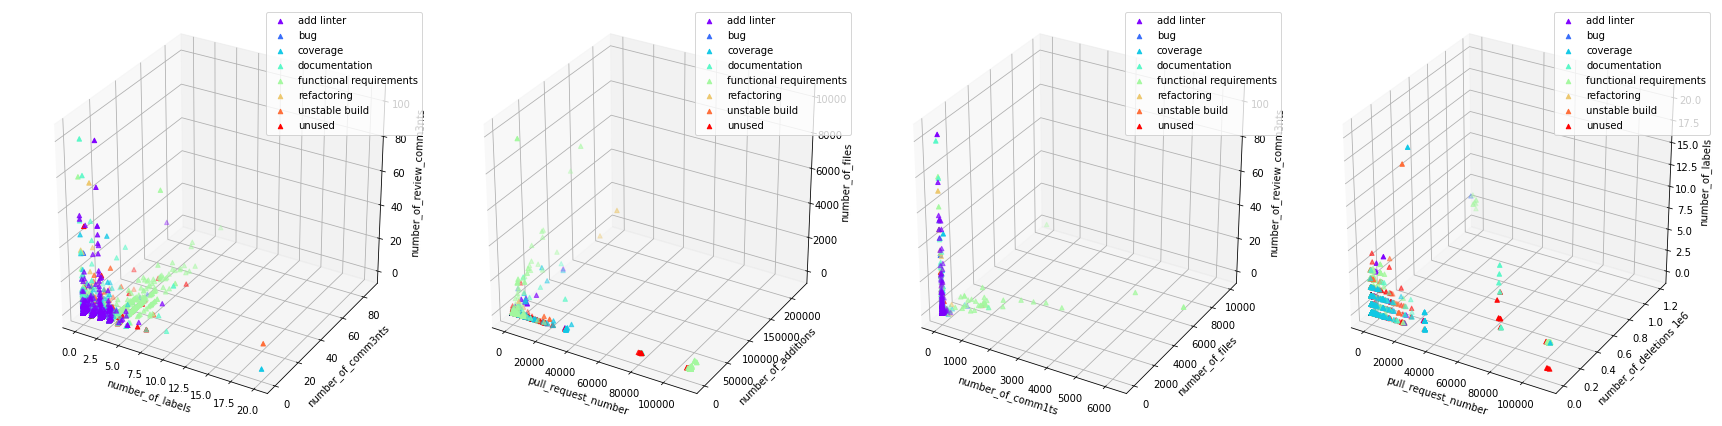

In [85]:
fig, ax = plt.subplots(nrows=1, ncols=4, figsize=(24, 6))
ax[0].set_axis_off()
ax[0] = fig.add_subplot(1, 4, 1, projection='3d')

x_feature = "number_of_labels"
y_feature = "number_of_comm3nts"
z_feature = "number_of_review_comm3nts"

for index, label in enumerate(labels):
    x = sq[sq["label"]==label][x_feature]
    y = sq[sq["label"]==label][y_feature]
    z = sq[sq["label"]==label][z_feature]
    ax[0].scatter(x, y, z, color=camouflage[label], label=labels[index], marker="^")

ax[0].set_xlabel(x_feature)
ax[0].set_ylabel(y_feature)
ax[0].set_zlabel(z_feature)                
ax[0].legend()

ax[1].set_axis_off()
ax[1] = fig.add_subplot(1, 4, 2, projection='3d')

x_feature = "pull_request_number"
y_feature = "number_of_additions"
z_feature = "number_of_files"

for index, label in enumerate(labels):
    x = sq[sq["label"]==label][x_feature]
    y = sq[sq["label"]==label][y_feature]
    z = sq[sq["label"]==label][z_feature]
    ax[1].scatter(x, y, z, color=camouflage[label], label=labels[index], marker="^")

ax[1].set_xlabel(x_feature)
ax[1].set_ylabel(y_feature)
ax[1].set_zlabel(z_feature)                
ax[1].legend()

ax[2].set_axis_off()
ax[2] = fig.add_subplot(1, 4, 3, projection='3d')

x_feature = "number_of_comm1ts"
y_feature = "number_of_files"
z_feature = "number_of_review_comm3nts"

for index, label in enumerate(labels):
    x = sq[sq["label"]==label][x_feature]
    y = sq[sq["label"]==label][y_feature]
    z = sq[sq["label"]==label][z_feature]
    ax[2].scatter(x, y, z, color=camouflage[label], label=labels[index], marker="^")

ax[2].set_xlabel(x_feature)
ax[2].set_ylabel(y_feature)
ax[2].set_zlabel(z_feature)                
ax[2].legend()

ax[3].set_axis_off()
ax[3] = fig.add_subplot(1, 4, 4, projection='3d')

x_feature = "pull_request_number"
y_feature = "number_of_deletions"
z_feature = "number_of_labels"

for index, label in enumerate(labels):
    x = sq[sq["label"]==label][x_feature]
    y = sq[sq["label"]==label][y_feature]
    z = sq[sq["label"]==label][z_feature]
    ax[3].scatter(x, y, z, color=camouflage[label], label=labels[index], marker="^")

ax[3].set_xlabel(x_feature)
ax[3].set_ylabel(y_feature)
ax[3].set_zlabel(z_feature)                
ax[3].legend()

plt.tight_layout(pad=1.0, w_pad=1.0, h_pad=1.5)
plt.show()